# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision includes algorithms which can discover patterns in visual data.

### Get the data

In [8]:
import sys

In [9]:
from tqdm.notebook import tqdm

In [10]:
import os

In [11]:
os.getcwd()

'D:\\PYTHON\\UdemyTensorFlow'

In [12]:
meta_path = 'data/food101/meta/meta'

In [13]:
import json

#### *Proceed with cells from `image_data_modification.ipynb` file*

#### Get labels (in JSON form)

In [15]:
# Get labels
def get_labels(label_path):
    """
    Accepts a label path (in the form of a JSON) and returns the file
    as a Python object.
    """
    with open(label_path) as f:
        return json.load(f)

train_labels = get_labels("data/food_101_all_data/meta/meta/train.json")
test_labels = get_labels("data/food_101_all_data/meta/meta/test.json")

In [16]:
# Should be 750 for training set and 250 for test set
print(len(train_labels["churros"]))
print(len(test_labels["churros"]))

750
250


#### Create target class folders and move images there

In [18]:
import shutil
import os

def copy_images(parent_folder, new_subset, dataset, target_labels):
    """
    Copies `labels[target_labels]` images from `parent_folder` to
    `new_subset` (named after `dataset`) folder.
    
    E.g. move steak images to data/steak_subset/train/ & 
    data/steak_subset/test/
    
    Parameters
    --------
    parent_folder (str) - original folder path with all data
    new_subset (str) - name of parent folder to copy to
    dataset (str) - which dataset? (train or test)
    labels (list) - list of training or test labels
    target_labels (list) - list of target labels to copy e.g. ["steak", "pizza"]
    """
    # Get the appropriate labels
    print(f"\nUsing {dataset} labels...")
    labels = get_labels("data/food_101_all_data/meta/meta/" + dataset + ".json")
    
    # Loop through target labels
    for i in target_labels:
        # Make target directory
        os.makedirs(parent_folder + "/" + new_subset + "/" + dataset + "/" + i, 
                    exist_ok=True)
        
        # Go through labels and get appropriate classes
        images_moved = [] # Keep track of images moved
        for j in labels[i]:
            # Create original image path and new path
            og_path = parent_folder + "/food_101_all_data/images/" + j + ".jpg"
            new_path = parent_folder + "/" + new_subset + "/" + dataset + "/" + j + ".jpg"
            
            # Copy images from old path to new path
            shutil.copy2(og_path, new_path)
            images_moved.append(new_path)
        print(f"Copied {len(images_moved)} images from {dataset} dataset {i} class...")

#### Create function to get random sample of images

Hmmm... this could probably be put into the `copy_images()` function. As in, only get a certain percent of images when looping through.

E.g. "only copy every X (1/10) images..."

In [19]:
def get_percent_images(target_dir, new_dir, sample_amount=0.1, random_state=42):
    """
    Get sample_amount percentage of random images from target_dir and copy them to new_dir.
    
    Preserves subdirectory file names.
    
    E.g. target_dir=pizza_steak/train/steak/all_files 
                -> new_dir_name/train/steak/X_percent_of_all_files
                
    Parameters
    --------
    target_dir (str) - file path of directory you want to extract images from
    new_dir (str) - new directory path you want to copy original images to
    sample_amount (float), default 0.1 - percentage of images to copy (e.g. 0.1 = 10%)
    random_state (int), default 42 - random seed value 
    """
    # Set random seed for reproducibility
    random.seed(random_state)
    
    # Get a list of dictionaries of image files in target_dir
    # e.g. [{"class_name":["2348348.jpg", "2829119.jpg"]}]
    images = [{dir_name: os.listdir(target_dir + dir_name)} for dir_name in os.listdir(target_dir)]

    for i in images:
        for k, v in i.items():
            # How many images to sample?
            sample_number = round(int(len(v)*sample_amount))
            print(f"There are {len(v)} total images in '{target_dir+k}' so we're going to copy {sample_number} to the new directory.")
            print(f"Getting {sample_number} random images for {k}...")
            random_images = random.sample(v, sample_number)

            # Make new dir for each key
            new_target_dir = new_dir + k
            print(f"Making dir: {new_target_dir}")
            os.makedirs(new_target_dir, exist_ok=True)

            # Keep track of images moved
            images_moved = []

            # Create file paths for original images and new file target
            print(f"Copying images from: {target_dir}\n\t\t to: {new_target_dir}/\n")
            for file_name in tqdm(random_images):
                og_path = target_dir + k + "/" + file_name
                new_path = new_target_dir + "/" + file_name

                # Copy images from OG path to new path
                shutil.copy2(og_path, new_path)
                images_moved.append(new_path)

            # Make sure number of images moved is correct
            assert len(os.listdir(new_target_dir)) == sample_number
            assert len(images_moved) == sample_number

#### Make binary data (pizza and steak)

Two classes: steak and pizza.

In [20]:
parent_folder = "data"
target_labels = ["steak", "pizza"]
new_subset = "pizza_steak"
datasets = ["train", "test"]

# Copy training/test images
for i in datasets:
    copy_images(parent_folder=parent_folder,
                new_subset=new_subset,
                dataset=i,
                #labels=labels,
                target_labels=target_labels)


Using train labels...
Copied 750 images from train dataset steak class...
Copied 750 images from train dataset pizza class...

Using test labels...
Copied 250 images from test dataset steak class...
Copied 250 images from test dataset pizza class...


In [21]:
# Should be 750 for training set and 250 for test set
print("Number of images in training set:", len(os.listdir("data/pizza_steak/train/steak")))
print("Number of images in test set:", len(os.listdir("data/pizza_steak/test/steak")))

Number of images in training set: 750
Number of images in test set: 250


In [22]:
# TK - functionize the below (turn them into error catchers)

In [23]:
# Make sure there are no overlaps in the training and test sets
# Get two sets of filenames from train/test and make sure the output equals 0
train_files = set(os.listdir("data/pizza_steak/train/steak"))
test_files = set(os.listdir("data/pizza_steak/test/steak"))

# There should be no intersection of file names in training/test set
assert len(train_files.intersection(test_files)) == 0

In [24]:
# Make sure there are no overlaps in the training and test sets
# Get two sets of filenames from train/test and make sure the output equals 0
train_files = set(os.listdir("data/pizza_steak/train/pizza"))
test_files = set(os.listdir("data/pizza_steak/test/pizza"))

# There should be no intersection of file names in training/test set
assert len(train_files.intersection(test_files)) == 0

#### Make 10% binary class dataset

Use this as an example of how a network from scratch (trained on full binary class dataset) and then using transfer learning on the 10% of data and seeing how it performs.

In [25]:
# Need 10% of train data
!ls data/pizza_steak

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [26]:
import random

In [28]:
# Make 10% sample binary class dataset (of training data only)
get_percent_images(target_dir="data/pizza_steak/train/",
                   new_dir="data/pizza_steak_10_percent/train/",
                   sample_amount=0.1, # 10%
                   random_state=42)

There are 750 total images in 'data/pizza_steak/train/pizza' so we're going to copy 75 to the new directory.
Getting 75 random images for pizza...
Making dir: data/pizza_steak_10_percent/train/pizza
Copying images from: data/pizza_steak/train/
		 to: data/pizza_steak_10_percent/train/pizza/



ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [29]:
# Make 1% sample binary class dataset
get_percent_images(target_dir="data/pizza_steak/train/",
                   new_dir="data/pizza_steak_1_percent/train/",
                   sample_amount=0.01, # 1%
                   random_state=42)

There are 750 total images in 'data/pizza_steak/train/pizza' so we're going to copy 7 to the new directory.
Getting 7 random images for pizza...
Making dir: data/pizza_steak_1_percent/train/pizza
Copying images from: data/pizza_steak/train/
		 to: data/pizza_steak_1_percent/train/pizza/



ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [30]:
# Copy binary classes test folder into binary classes percentages folders
binary_test = "data/pizza_steak/test/"
shutil.copytree(binary_test, "data/pizza_steak_10_percent/test/")
shutil.copytree(binary_test, "data/pizza_steak_1_percent/test/")

FileExistsError: [WinError 183] Nie można utworzyć pliku, który już istnieje: 'data/pizza_steak_10_percent/test/'

#### Visualize some images

We'll need [Pillow](https://pillow.readthedocs.io/en/stable/index.html) (also called PIL - Python Image Library) to see images with matplotlib.

In [31]:
# # Install pillow
# import sys
!conda install --yes --prefix {sys.prefix} -c anaconda pillow

Solving environment: ...working... done

# All requested packages already installed.



In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Exception ignored in: <function tqdm.__del__ at 0x000002225126E318>
Traceback (most recent call last):
  File "C:\Users\AndrzejO\anaconda3\envs\keras-gpu\lib\site-packages\tqdm\std.py", line 1162, in __del__
    self.close()
  File "C:\Users\AndrzejO\anaconda3\envs\keras-gpu\lib\site-packages\tqdm\notebook.py", line 287, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x000002225126E318>
Traceback (most recent call last):
  File "C:\Users\AndrzejO\anaconda3\envs\keras-gpu\lib\site-packages\tqdm\std.py", line 1162, in __del__
    self.close()
  File "C:\Users\AndrzejO\anaconda3\envs\keras-gpu\lib\site-packages\tqdm\notebook.py", line 287, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x000002225126E318>
Traceback (most recent call last):
 

data/food_101_all_data/images/chicken_curry/364411.jpg


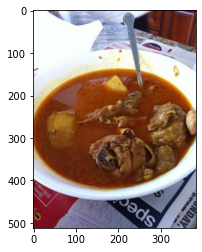

In [33]:
# View a single image
target_dir = "data/food_101_all_data/images/"
target_class = "chicken_curry"
target_path = target_dir+target_class
file_names = os.listdir(target_path)
target_img = target_path + "/" + random.sample(file_names, 1)[0]
print(target_img)

img = mpimg.imread(target_img)
plt.imshow(img);

In [34]:
def view_three_images(target_dir, target_class):
    """
    Randomly selects and displays 3 random images from `target_class` folder in `target_dir` folder.
    
    Requires target_dir to be in format:
        target_dir
                 |target_class_1
                 |target_class_2
                 |...
                 
    """
    target_path = target_dir+target_class
    file_names = os.listdir(target_path)
    target_images = random.sample(file_names, 3)
    
    # Plot images
    plt.figure(figsize=(15, 6))
    for i, img in enumerate(target_images):
        img_path = target_path + "/" + img
        plt.subplot(1, 3, i+1)
        plt.imshow(mpimg.imread(img_path))
        plt.title(target_class)
        plt.axis("off")

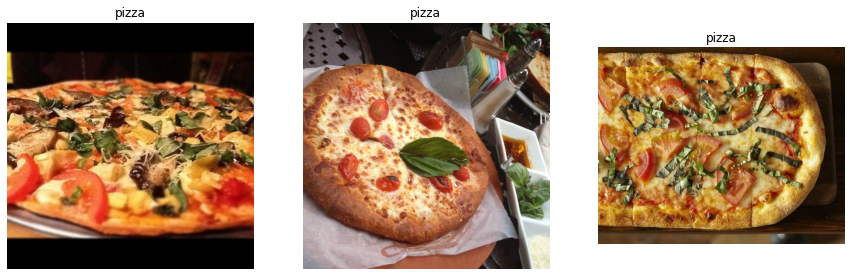

In [35]:
view_three_images(target_dir="data/food_101_all_data/images/", 
                  target_class="pizza")

#### Make 10 class dataset

Pick 10 classes and create a folder with 10 datasets.

In [36]:
!ls data/food_101_all_data/meta/meta

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [37]:
# Get all classnames
classes = []
with open(os.path.join( "data/food_101_all_data/meta/meta/classes.txt")) as f:
    for line in f.readlines():
        classes.append(line.split("\n")[0]) 

classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [38]:
ten_classes = ["pizza", "steak", "sushi", "ramen", "chicken_wings",
               "chicken_curry", "hamburger", "fried_rice", "grilled_salmon", 
               "ice_cream"]
len(ten_classes)

10

In [39]:
parent_folder = "data"
new_subset = "10_food_classes"
datasets = ["train", "test"]

# Copy training/test images
for i in datasets:
    copy_images(parent_folder=parent_folder,
                new_subset=new_subset,
                dataset=i,
                #labels=labels,
                target_labels=ten_classes)


Using train labels...
Copied 750 images from train dataset pizza class...
Copied 750 images from train dataset steak class...
Copied 750 images from train dataset sushi class...
Copied 750 images from train dataset ramen class...
Copied 750 images from train dataset chicken_wings class...
Copied 750 images from train dataset chicken_curry class...
Copied 750 images from train dataset hamburger class...
Copied 750 images from train dataset fried_rice class...
Copied 750 images from train dataset grilled_salmon class...
Copied 750 images from train dataset ice_cream class...

Using test labels...
Copied 250 images from test dataset pizza class...
Copied 250 images from test dataset steak class...
Copied 250 images from test dataset sushi class...
Copied 250 images from test dataset ramen class...
Copied 250 images from test dataset chicken_wings class...
Copied 250 images from test dataset chicken_curry class...
Copied 250 images from test dataset hamburger class...
Copied 250 images fr

In [ ]:
view_three_images(target_dir="data/food_101_all_data/images/", 
                  target_class="ice_cream")

In [40]:
# Make 10% dataset of 10_food_classes (of training data only)
get_percent_images(target_dir="data/10_food_classes/train/",
                   new_dir="data/10_food_classes_10_percent/train/",
                   sample_amount=0.1, # 1%
                   random_state=42)

There are 750 total images in 'data/10_food_classes/train/chicken_curry' so we're going to copy 75 to the new directory.
Getting 75 random images for chicken_curry...
Making dir: data/10_food_classes_10_percent/train/chicken_curry
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_10_percent/train/chicken_curry/



ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [41]:
# Make 1% dataset of 10_food_classes (of training data only)
get_percent_images(target_dir="data/10_food_classes/train/",
                   new_dir="data/10_food_classes_1_percent/train/",
                   sample_amount=0.01, # 1%
                   random_state=42)

There are 750 total images in 'data/10_food_classes/train/chicken_curry' so we're going to copy 7 to the new directory.
Getting 7 random images for chicken_curry...
Making dir: data/10_food_classes_1_percent/train/chicken_curry
Copying images from: data/10_food_classes/train/
		 to: data/10_food_classes_1_percent/train/chicken_curry/



ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [42]:
# Copy 10 classes test folder into 10 classes percentages folders
ten_percent_test = "data/10_food_classes/test/"
shutil.copytree(ten_percent_test, "data/10_food_classes_10_percent/test/")
shutil.copytree(ten_percent_test, "data/10_food_classes_1_percent/test/")

'data/10_food_classes_1_percent/test/'

#### Split whole dataset into train and test

In [43]:
classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [44]:
parent_folder = "data"
new_subset = "all_food_classes"
datasets = ["train", "test"]

# Copy training/test images
for i in datasets:
    copy_images(parent_folder=parent_folder,
                new_subset=new_subset,
                dataset=i,
                target_labels=classes)


Using train labels...
Copied 750 images from train dataset apple_pie class...
Copied 750 images from train dataset baby_back_ribs class...
Copied 750 images from train dataset baklava class...
Copied 750 images from train dataset beef_carpaccio class...
Copied 750 images from train dataset beef_tartare class...
Copied 750 images from train dataset beet_salad class...
Copied 750 images from train dataset beignets class...
Copied 750 images from train dataset bibimbap class...
Copied 750 images from train dataset bread_pudding class...
Copied 750 images from train dataset breakfast_burrito class...
Copied 750 images from train dataset bruschetta class...
Copied 750 images from train dataset caesar_salad class...
Copied 750 images from train dataset cannoli class...
Copied 750 images from train dataset caprese_salad class...
Copied 750 images from train dataset carrot_cake class...
Copied 750 images from train dataset ceviche class...
Copied 750 images from train dataset cheesecake class

In [45]:
# Make 10% of all class images
get_percent_images(target_dir="data/all_food_classes/train/",
                   new_dir="data/all_food_classes_10_percent/train/",
                   sample_amount=0.1, # 10%
                   random_state=42)

There are 750 total images in 'data/all_food_classes/train/apple_pie' so we're going to copy 75 to the new directory.
Getting 75 random images for apple_pie...
Making dir: data/all_food_classes_10_percent/train/apple_pie
Copying images from: data/all_food_classes/train/
		 to: data/all_food_classes_10_percent/train/apple_pie/



Exception ignored in: <function tqdm.__del__ at 0x000002225126E318>
Traceback (most recent call last):
  File "C:\Users\AndrzejO\anaconda3\envs\keras-gpu\lib\site-packages\tqdm\std.py", line 1162, in __del__
    self.close()
  File "C:\Users\AndrzejO\anaconda3\envs\keras-gpu\lib\site-packages\tqdm\notebook.py", line 287, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'
Exception ignored in: <function tqdm.__del__ at 0x000002225126E318>
Traceback (most recent call last):
  File "C:\Users\AndrzejO\anaconda3\envs\keras-gpu\lib\site-packages\tqdm\std.py", line 1162, in __del__
    self.close()
  File "C:\Users\AndrzejO\anaconda3\envs\keras-gpu\lib\site-packages\tqdm\notebook.py", line 287, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [ ]:
# Copy all classes test folder into all classes percentage folders
ten_percent_test = "data/all_food_classes/test/"
shutil.copytree(ten_percent_test, "data/all_food_classes_10_percent/test/")

## Inspect the data